## Project: Time Series Forecasting :

### Forecasting the sudden surge of COVID-19 cases in Delhi, India during the month of April, 2021 and testing out various forecasting methods to find out which forecast method is the most efficient.

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
df = pd.read_excel("Delhi_covid.xlsx")

In [3]:
df.head()

,S.No,Date,Cured,Deaths,Confirmed
0,1,2020-03-02,0,0,1
1,2,2020-03-03,0,0,1
2,3,2020-03-04,0,0,1
3,4,2020-03-05,0,0,2
4,5,2020-03-06,0,0,3


In [4]:
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%d")
df = df.set_index("Date")


In [5]:
df.drop("S.No", axis=1, inplace=True)

In [6]:
df.head()

,Cured,Deaths,Confirmed
Date,,,
2020-03-02,0,0,1
2020-03-03,0,0,1
2020-03-04,0,0,1
2020-03-05,0,0,2
2020-03-06,0,0,3


## Time Series Analysis

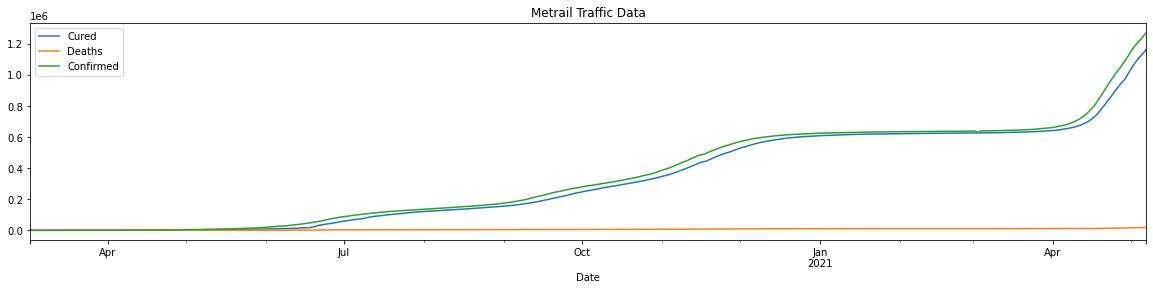

In [7]:
df.plot(figsize=(20,4))
plt.legend(loc="best")
plt.title("Metrail Traffic Data")
plt.show(block=False)

## Build and Evaluate Time Series Forecasting

### Spliting Time Series into Train and Test Set

In [8]:
train_len = 407
train = df[0:train_len]
test = df[train_len:]

## Method 1: Naive Method

In [9]:
y_hat_naive = test.copy()
y_hat_naive["naive_forecast"] = train["Confirmed"][train_len-1]

### Plot Train, Test and Forecast set

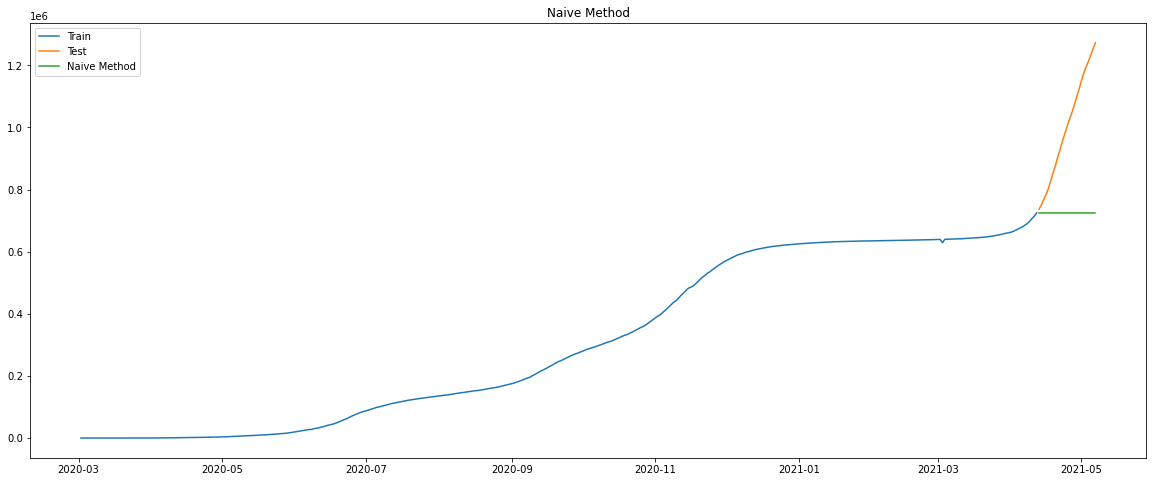

In [10]:
plt.figure(figsize=(20,8))
plt.plot(train["Confirmed"], label = "Train")
plt.plot(test["Confirmed"], label = "Test")
plt.plot(y_hat_naive["naive_forecast"], label = "Naive Method")
plt.legend(loc="best")
plt.title("Naive Method")
plt.show()

### Measuring RMSE and MAPE

In [11]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test["Confirmed"], y_hat_naive["naive_forecast"])).round(2)
mape = np.round(np.mean(np.abs(test["Confirmed"] - y_hat_naive["naive_forecast"])/test["Confirmed"])*100,2)

results = pd.DataFrame({"Method":["Naive Method"], "RMSE":[rmse], "MAPE": [mape]})
results = results[["Method", "RMSE", "MAPE"]]
results

,Method,RMSE,MAPE
0,Naive Method,323990.23,25.42


## Method 2: Simple Average Method

In [12]:
y_hat_avg = test.copy()
y_hat_avg["avg_forecast"] = train["Confirmed"].mean()

### Plot Train, Test and Forecast Method

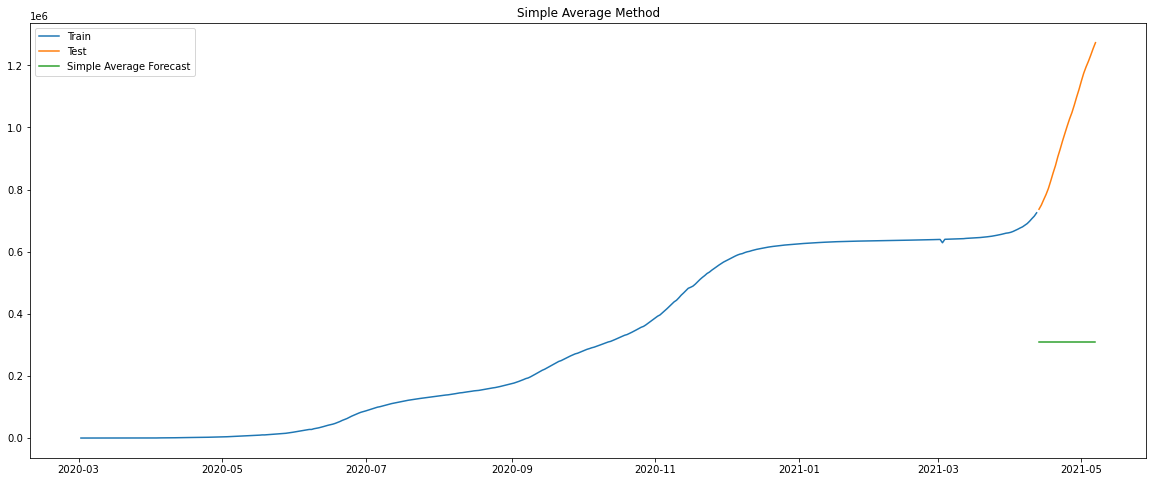

In [13]:
plt.figure(figsize=(20,8))
plt.plot(train["Confirmed"], label = "Train")
plt.plot(test["Confirmed"], label = "Test")
plt.plot(y_hat_avg["avg_forecast"], label = "Simple Average Forecast")
plt.legend(loc="best")
plt.title("Simple Average Method")
plt.show()

### Measuring RMSE and MAPE

In [14]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test["Confirmed"], y_hat_avg["avg_forecast"])).round(2)
mape = np.round(np.mean(np.abs(test["Confirmed"] - y_hat_avg["avg_forecast"])/test["Confirmed"])*100, 2)

tempResults = pd.DataFrame({"Method":"Simple Average Method", "RMSE":[rmse], "MAPE": [mape]})

results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,323990.23,25.42
0,Simple Average Method,713185.53,68.25


## Method 3(a): Simple Moving Average - 12 Months Window

In [15]:
y_hat_sma = df.copy()
ma_window = 12
y_hat_sma["sma_forecast"] = df["Confirmed"].rolling(ma_window).mean()
y_hat_sma["sma_forecast"][train_len:] = y_hat_sma["sma_forecast"][train_len-1]

### Plot Train, Test and Forecast Set

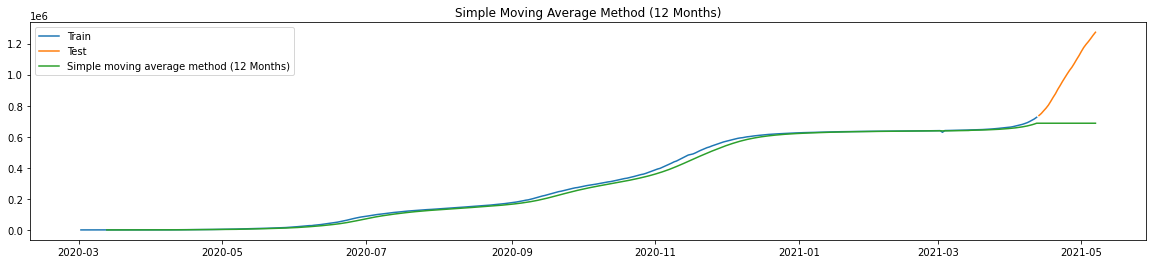

In [16]:
plt.figure(figsize=(20,4))
plt.plot(train["Confirmed"], label = "Train")
plt.plot(test["Confirmed"], label = "Test")
plt.plot(y_hat_sma["sma_forecast"], label = "Simple moving average method (12 Months)")
plt.legend(loc="best")
plt.title("Simple Moving Average Method (12 Months)")
plt.show()

### Measuring RMSE and MAPE

In [17]:
rmse = np.sqrt(mean_squared_error(test["Confirmed"], y_hat_sma["sma_forecast"][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test["Confirmed"] - y_hat_sma["sma_forecast"][train_len:])/test["Confirmed"])*100,2)

tempResults = pd.DataFrame({"Method":["Simple Average Moving Method_12 Months"], "RMSE":[rmse], "MAPE": [mape]})

results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,323990.23,25.42
0,Simple Average Method,713185.53,68.25
0,Simple Average Moving Method_12 Months,357050.83,29.34


## Method 3(b): Simple Moving Average - 6 Months Window

In [18]:
y_hat_sma = df.copy()
ma_window = 6
y_hat_sma["sma_forecast"] = df["Confirmed"].rolling(ma_window).mean()
y_hat_sma["sma_forecast"][train_len:] = y_hat_sma["sma_forecast"][train_len-1]

### Plot Train, Test and Forecast Set

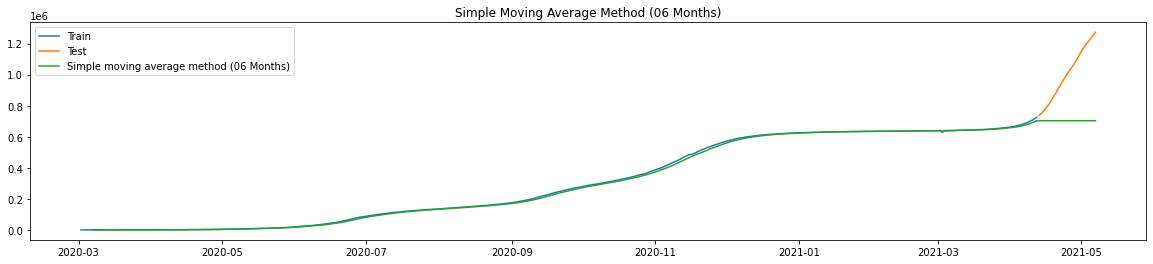

In [19]:
plt.figure(figsize=(20,4))
plt.plot(train["Confirmed"], label = "Train")
plt.plot(test["Confirmed"], label = "Test")
plt.plot(y_hat_sma["sma_forecast"], label = "Simple moving average method (06 Months)")
plt.legend(loc="best")
plt.title("Simple Moving Average Method (06 Months)")
plt.show()

### Measuring RMSE and MAPE

In [20]:
rmse = np.sqrt(mean_squared_error(test["Confirmed"], y_hat_sma["sma_forecast"][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test["Confirmed"] - y_hat_sma["sma_forecast"][train_len:])/test["Confirmed"])*100,2)

tempResults = pd.DataFrame({"Method":["Simple Average Moving Method_06 Months"], "RMSE":[rmse], "MAPE": [mape]})

results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,323990.23,25.42
0,Simple Average Method,713185.53,68.25
0,Simple Average Moving Method_12 Months,357050.83,29.34
0,Simple Average Moving Method_06 Months,342858.81,27.67


## Method 3(c): Simple Moving Average - 3 Months Window

In [21]:
y_hat_sma = df.copy()
ma_window = 3
y_hat_sma["sma_forecast"] = df["Confirmed"].rolling(ma_window).mean()
y_hat_sma["sma_forecast"][train_len:] = y_hat_sma["sma_forecast"][train_len-1]

### Plot Train, Test and Forecast Set

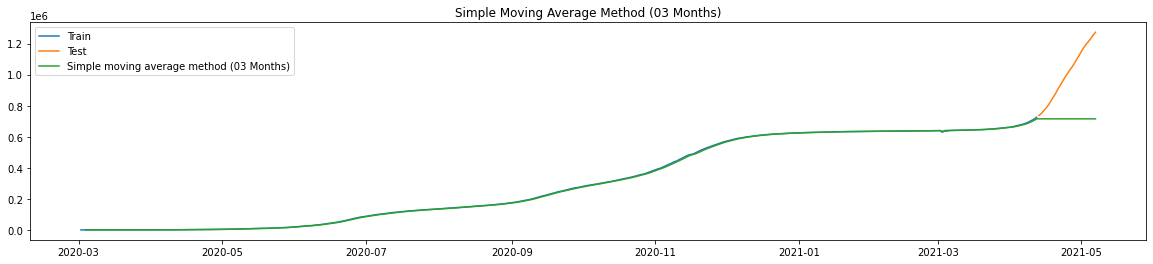

In [22]:
plt.figure(figsize=(20,4))
plt.plot(train["Confirmed"], label = "Train")
plt.plot(test["Confirmed"], label = "Test")
plt.plot(y_hat_sma["sma_forecast"], label = "Simple moving average method (03 Months)")
plt.legend(loc="best")
plt.title("Simple Moving Average Method (03 Months)")
plt.show()

### Measuring RMSE and MAPE

In [23]:
rmse = np.sqrt(mean_squared_error(test["Confirmed"], y_hat_sma["sma_forecast"][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test["Confirmed"] - y_hat_sma["sma_forecast"][train_len:])/test["Confirmed"])*100,2)

tempResults = pd.DataFrame({"Method":["Simple Average Moving Method_03 Months"], "RMSE":[rmse], "MAPE": [mape]})
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,323990.23,25.42
0,Simple Average Method,713185.53,68.25
0,Simple Average Moving Method_12 Months,357050.83,29.34
0,Simple Average Moving Method_06 Months,342858.81,27.67
0,Simple Average Moving Method_03 Months,332400.59,26.43


## Method 4: Simple Exponential Smoothing

In [24]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train["Confirmed"])
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses["ses_forecast"] = model_fit.forecast(50)

C:\Users\ADMIN\Anaconda3\Anac\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


### Plot Train, Test and Forecast Set

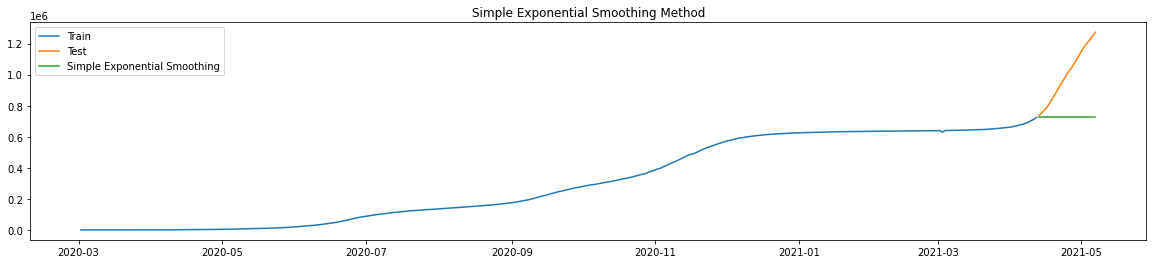

In [25]:
plt.figure(figsize=(20,4))
plt.plot(train["Confirmed"], label="Train")
plt.plot(test["Confirmed"], label="Test")
plt.plot(y_hat_ses["ses_forecast"], label="Simple Exponential Smoothing")
plt.legend(loc="best")
plt.title("Simple Exponential Smoothing Method")
plt.show()

### Measuring RMSE and MAPE

In [26]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test["Confirmed"], y_hat_ses["ses_forecast"])).round(2)
mape = np.round(np.mean(np.abs(test["Confirmed"] - y_hat_ses["ses_forecast"])/test["Confirmed"])*100, 2)

tempResults = pd.DataFrame({"Method":["Simple Exponential Smoothing"], "RMSE":[rmse], "MAPE": [mape]})
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,323990.23,25.42
0,Simple Average Method,713185.53,68.25
0,Simple Average Moving Method_12 Months,357050.83,29.34
0,Simple Average Moving Method_06 Months,342858.81,27.67
0,Simple Average Moving Method_03 Months,332400.59,26.43
0,Simple Exponential Smoothing,323990.23,25.42


## Method 5: Holt's Exponential Smoothing

In [27]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train["Confirmed"]), seasonal_periods=12, trend="additive", seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt["holt_forecast"] = model_fit.forecast(25)

{'smoothing_level': 0.7256636534864668, 'smoothing_slope': 0.4733091444081468, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 1.0, 'initial_slope': 0.01, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot Train, Test and Forecast Set

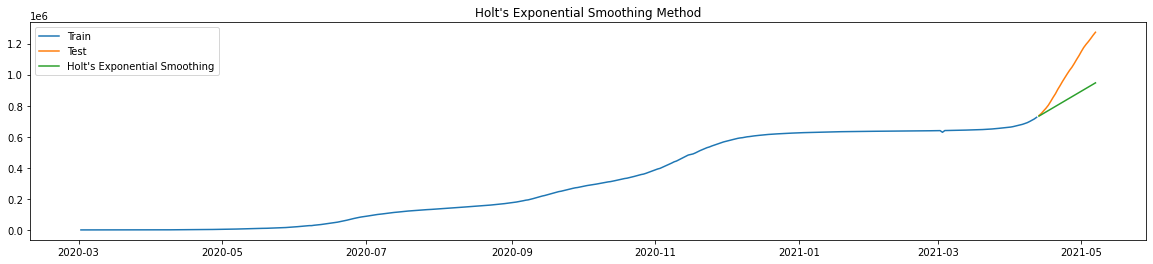

In [28]:
plt.figure(figsize=(20,4))
plt.plot(train["Confirmed"], label="Train")
plt.plot(test["Confirmed"], label="Test")
plt.plot(y_hat_holt["holt_forecast"], label="Holt's Exponential Smoothing")
plt.legend(loc="best")
plt.title("Holt's Exponential Smoothing Method")
plt.show()

### Measuring RMSE and MAPE

In [29]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test["Confirmed"], y_hat_holt["holt_forecast"])).round(2)
mape = np.round(np.mean(np.abs(test["Confirmed"] - y_hat_holt["holt_forecast"])/test["Confirmed"])*100, 2)

tempResults = pd.DataFrame({"Method":["Holt's Exponential Smoothing"], "RMSE":[rmse], "MAPE": [mape]})
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,323990.23,25.42
0,Simple Average Method,713185.53,68.25
0,Simple Average Moving Method_12 Months,357050.83,29.34
0,Simple Average Moving Method_06 Months,342858.81,27.67
0,Simple Average Moving Method_03 Months,332400.59,26.43
0,Simple Exponential Smoothing,323990.23,25.42
0,Holt's Exponential Smoothing,192540.46,14.74


## Method 6: Holt's Winter Exponential Smoothing / Additive Seasonal Trend

In [30]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train["Confirmed"]), seasonal_periods = 3, trend="add", seasonal="add")
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa["hwa_forecast"] = model_fit.forecast(25)

{'smoothing_level': 0.7272997700231216, 'smoothing_slope': 0.4726841083686295, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 307875.2941179696, 'initial_slope': 0.5555554795123271, 'initial_seasons': array([-307918.9283452 , -307846.13154338, -307856.2288907 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot Train, Test and Forecast Set

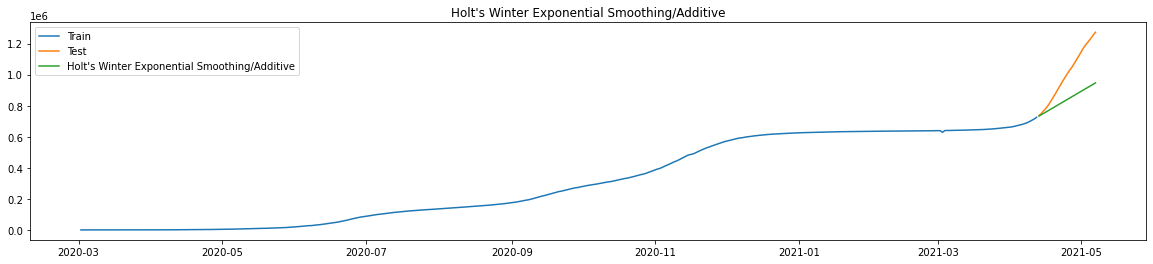

In [31]:
plt.figure(figsize=(20,4))
plt.plot(train["Confirmed"], label="Train")
plt.plot(test["Confirmed"], label="Test")
plt.plot(y_hat_hwa["hwa_forecast"], label="Holt's Winter Exponential Smoothing/Additive")
plt.legend(loc="best")
plt.title("Holt's Winter Exponential Smoothing/Additive")
plt.show()

### Measuring RMSE and MAPE

In [32]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test["Confirmed"], y_hat_hwa["hwa_forecast"])).round(2)
mape = np.round(np.mean(np.abs(test["Confirmed"] - y_hat_hwa["hwa_forecast"])/test["Confirmed"])*100, 2)

tempResults = pd.DataFrame({"Method":["Holt's Winter Exponential Smoothing/Additive"], "RMSE":[rmse], "MAPE": [mape]})
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,323990.23,25.42
0,Simple Average Method,713185.53,68.25
0,Simple Average Moving Method_12 Months,357050.83,29.34
0,Simple Average Moving Method_06 Months,342858.81,27.67
0,Simple Average Moving Method_03 Months,332400.59,26.43
0,Simple Exponential Smoothing,323990.23,25.42
0,Holt's Exponential Smoothing,192540.46,14.74
0,Holt's Winter Exponential Smoothing/Additive,192689.89,14.75


## Method 7: Holt's Winter Exponential Smoothing / Multiplicative Seasonal Trend

In [33]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train["Confirmed"]), seasonal_periods = 3, trend="add", seasonal="mul")
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa["hwa_forecast"] = model_fit.forecast(25)

{'smoothing_level': 0.7368421052631579, 'smoothing_slope': 0.47368421052631576, 'smoothing_seasonal': 0.0001, 'damping_slope': nan, 'initial_level': 307875.29411764705, 'initial_slope': 0.5555555555555555, 'initial_seasons': array([3.24165523e-06, 3.24341197e-06, 3.24454138e-06]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\ADMIN\Anaconda3\Anac\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


### Plot Train, Test and Forecast Set

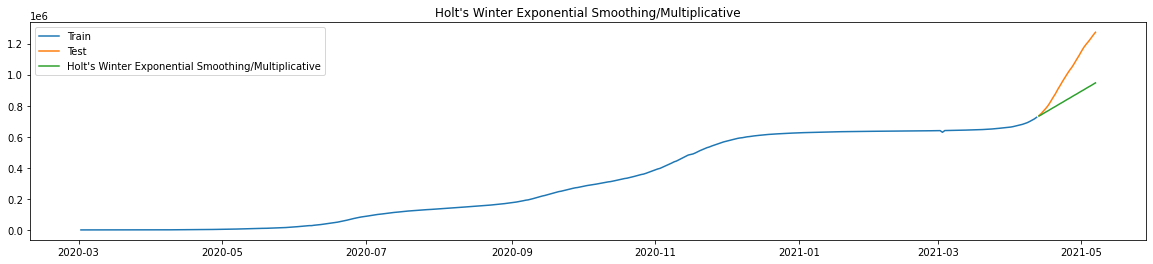

In [34]:
plt.figure(figsize=(20,4))
plt.plot(train["Confirmed"], label="Train")
plt.plot(test["Confirmed"], label="Test")
plt.plot(y_hat_hwa["hwa_forecast"], label="Holt's Winter Exponential Smoothing/Multiplicative")
plt.legend(loc="best")
plt.title("Holt's Winter Exponential Smoothing/Multiplicative")
plt.show()

### Measuring RMSE and MAPE

In [35]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test["Confirmed"], y_hat_hwa["hwa_forecast"])).round(2)
mape = np.round(np.mean(np.abs(test["Confirmed"] - y_hat_hwa["hwa_forecast"])/test["Confirmed"])*100, 2)

tempResults = pd.DataFrame({"Method":["Holt's Winter Exponential Smoothing/Multiplicative"], "RMSE":[rmse], "MAPE": [mape]})
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Method,323990.23,25.42
0,Simple Average Method,713185.53,68.25
0,Simple Average Moving Method_12 Months,357050.83,29.34
0,Simple Average Moving Method_06 Months,342858.81,27.67
0,Simple Average Moving Method_03 Months,332400.59,26.43
0,Simple Exponential Smoothing,323990.23,25.42
0,Holt's Exponential Smoothing,192540.46,14.74
0,Holt's Winter Exponential Smoothing/Additive,192689.89,14.75
0,Holt's Winter Exponential Smoothing/Multiplica...,192711.66,14.75


## Conclusion:

 The Holt's Exponential Smoothing Method is the most efficient Forecast Method while the Simple Average Method is the worst